## Sorting Algorithms Tests

The purpose of this analysis is the runtime and amount of resources needed by the selection sort algorithm for five data arrays (5,000 numbers, 10,000 numbers, 15,000 numbers, 20,000 numbers, and 25,000 numbers) using a uniform random number generator.

#### Import necessary modules

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format # specify pandas float print format

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14}) # set font size for plt graphs

#### Class that holds sorting methods

In [2]:
# Define class to sort arrays using selection, bubble, and insertion sort.
# The class includes a method to include run time for the sorting methods.
class Sort():
    
    # Method to initaite class
    def __init__(self, arr_size = 1, seed = 123):
        self.arr_size = arr_size
        self.seed = seed
        self.arr = list(np.random.randint(low = 0,dtype=int, high=1000, size=self.arr_size))
    
    
    
    # Method to find and store the index of the smalles value in the array
    # This method is necessary for the selection sort algorithm
    def findSmallest(self):
        smallest = self.arr[0]
        smallest_index = 0
        
        for i in range(1, len(self.arr)):
            if self.arr[i] < smallest:
                smallest = self.arr[i]
                smallest_index = i
        
        return smallest_index
    
    
    
    # Selection sort algorithm from Grokking Algorithms textbook
    def selectionSort(self):
        
        # Empty list to hold sorted output
        newArr = []
        
        # Loop over array, find the smallest value, delete it from array
        # and append to the empty list defined above
        for i in range(len(self.arr)):
            smallest = self.findSmallest()
            newArr.append(self.arr.pop(smallest)) #The pop() method removes the element at the specified position.
        
        # replace the class array with the sorted array
        self.arr = newArr
    
    
    
    # Bubble sort algorithm
    def bubbleSort(self): 

    # This algorithm compares each pair of adjacent elements in a loop and swap them if
    # the first elment in the pair is larger than the second element
    
        # Define i as the element to compare and swap
        for i in range(self.arr_size): 

            # Compare i with the jth element
            for j in range(0, self.arr_size-i-1): 
                
                # Swap it arr[i] > arr[j]
                if self.arr[j] > self.arr[j+1] : 
                    self.arr[j], self.arr[j+1] = self.arr[j+1], self.arr[j]

    # Insertion sort algorithm
    def insertionSort(self): 
    
    # This algorithm builds a sorted list by removing one element at a time
    # and finding the right position in the sorted list
    
        # Loop through 1 to len(arr) 
        for i in range(1, len(self.arr)): 
            
            # Store element to compare in a variable
            key = self.arr[i] 

            # Move elements of the arr one position ahead if element > key
            
            j = i-1 # Length of the array without key value
            while j >=0 and key < self.arr[j] : 
                    self.arr[j+1] = self.arr[j] 
                    j -= 1
            self.arr[j+1] = key
            
    # Method to record run times for the sort methods defined above
    def sort_record_times(self, func = "selectionSort"):

        # Sort array and get sort time
        import datetime
        
        # Record start time
        start = datetime.datetime.now()
        
        # Evaluate search method
        eval("self." + func + "()")
        
        # Record end time 
        end = datetime.datetime.now()
        
        # Return miliseconds ellapsed between start and end time
        return (end - start).microseconds/1000

#### Create random arrays and store Sort class results in a data frame
We created a list of array sizes and a list of sorting algorithm names to create and record runtime of random arrays in a loop for each array size and algorithm. We generate the random arrays, sort them, and record runtime using the Sort class. The results are stored in a Pandas dataframe object where the colum names correspond to each sorting algorithm and the row index to the array size

In [3]:
# Create a list with random array size
arr_size = [5000, 10000, 15000, 20000, 25000]
func_list = ["selectionSort", "bubbleSort", "insertionSort"]

# Create an empty dataframe to store runtime for each algorithm
runtime_df = pd.DataFrame(index= arr_size, columns= func_list)

# Define random arrays in a loop and record sort runtimes
# By looping first over array_size list and then over func_list list
for k in range(len(arr_size)):
 
    for i in range(len(func_list)):
        
        # Print current array size and algorithm being evaluated
        print("Array Size:",arr_size[k],"Sorting Algorithm:", func_list[i])
    
        # Call Sort class and record runtime
        exec(f'runtime_df.loc[arr_size[{k}],func_list[{i}]] = Sort(arr_size = arr_size[{k}]).sort_record_times(func = func_list[{i}])')


Array Size: 5000 Sorting Algorithm: selectionSort
Array Size: 5000 Sorting Algorithm: bubbleSort
Array Size: 5000 Sorting Algorithm: insertionSort
Array Size: 10000 Sorting Algorithm: selectionSort
Array Size: 10000 Sorting Algorithm: bubbleSort
Array Size: 10000 Sorting Algorithm: insertionSort
Array Size: 15000 Sorting Algorithm: selectionSort
Array Size: 15000 Sorting Algorithm: bubbleSort
Array Size: 15000 Sorting Algorithm: insertionSort
Array Size: 20000 Sorting Algorithm: selectionSort
Array Size: 20000 Sorting Algorithm: bubbleSort
Array Size: 20000 Sorting Algorithm: insertionSort
Array Size: 25000 Sorting Algorithm: selectionSort
Array Size: 25000 Sorting Algorithm: bubbleSort
Array Size: 25000 Sorting Algorithm: insertionSort


In [4]:
runtime_df

,selectionSort,bubbleSort,insertionSort
5000,818.035,888.963,226.035
10000,283.999,774.992,983.965
15000,371.997,482.003,714.999
20000,708.033,523.973,163.032
25000,722.999,552.980,285.037


In [5]:
runtime_df.mean()

selectionSort   581.013
bubbleSort      644.582
insertionSort   474.614
dtype: float64

The table above show that there is no universal wort sorting algorithm. Selection sort performed worst on smaller arrays, but it's performance improved as the array size increases. The opposite was the cases for Insertion and Bubble sort. 

Note that this example shows only the result of one sorting operation per algorithm per array size. More trials are needed to determine if these findings are consistent.

In theory, computational performance for each algoritm is as follows:

In [6]:
#(comparisons, swaps)
#                Selection Sort    Bubble Sort    Insertion Sort
# Worst case     (О(n^2),О(n))    (О(n^2),О(n^2))  (О(n^2),О(n^2))
# Average case   (О(n^2),О(n))    (О(n^2),О(n^2))  (О(n^2),О(n^2))
# Best Case      (О(n^2),О(n))    (О(n^2),О(1))    (О(n^2),О(1))

### Figure 1
#### Plot of execution time against problem size for each form of the algorithm being tested

Figure 1 illustrates what we described above after building a runtime_df table. The is no universal best/worst algoritm, it depends on other factors such as sample size.

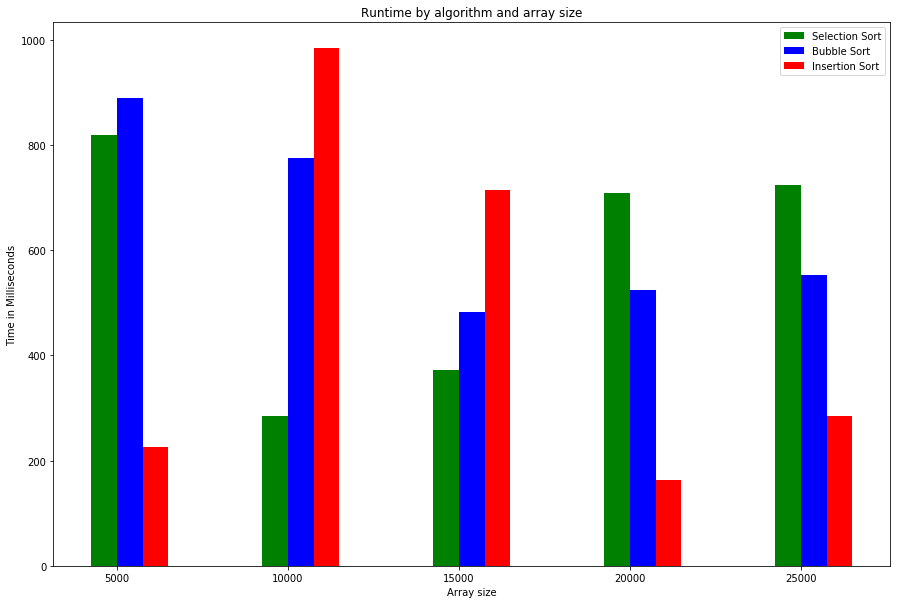

In [7]:
x_loc = np.arange(runtime_df.shape[0]) # the x locations for the groups
width = 0.15 # the width of the bars

# set height of bar
bars1 = runtime_df.selectionSort
bars2 = runtime_df.bubbleSort
bars3 = runtime_df.insertionSort


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

fig, ax = plt.subplots(figsize=(15, 10))
res1 = ax.bar(r1, bars1, width, color='green')
res2 = ax.bar(r2, bars2, width, color='blue')
res3 = ax.bar(r3, bars3, width, color='red')

# add labels, title and axes ticks
ax.set_ylabel('Time in Milliseconds')
ax.set_xlabel('Array size')
ax.set_title('Runtime by algorithm and array size')
ax.set_xticks(x_loc + width / 2)
ax.set_xticklabels(arr_size)


ax.legend((res1[0], res2[0], res3[0]), 
          ('Selection Sort', 'Bubble Sort','Insertion Sort'))
plt.show()